<a href="https://colab.research.google.com/github/LeandroCoelhos/Celeritas_Previsao_Plantio/blob/main/LGBM/lgbm_telco_exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------
**Telco - EDA + LightGBM + Stylized Report**
=====================================

* ***LGBM : Test - Roc_auc              =  .86***
* ***LGBM : CV - Roc_auc (5 folds) =  .85***

***Vincent Lugat***

*January 2019*

https://www.kaggle.com/code/vincentlugat/telco-eda-lightgbm-stylized-report/notebook

----------

![](https://image.noelshack.com/fichiers/2019/02/4/1547131561-report.jpg)

**Telcom Customer Churn**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The raw data contains 7043 rows (customers) and 21 columns (features).
The “Churn” column is our target.

* **customerID** : Customer ID
* **gende**r : Whether the customer is a male or a female
* **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
* **Partner** : Whether the customer has a partner or not (Yes, No)
* **Dependents** : Whether the customer has dependents or not (Yes, No)
* **tenure** : Number of months the customer has stayed with the company
* **PhoneService** : Whether the customer has a phone service or not (Yes, No)
* **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** : The amount charged to the customer monthly
* **TotalCharges** : The total amount charged to the customer
* **Churn** : Whether the customer churned or not (Yes or No)

- <a href='#1'>1. Load libraries and read the data</a>  
    - <a href='#1.1'>1.1. Load libraries</a> 
    - <a href='#1.2'>1.2. Read the data</a> 
    - <a href='#1.3'>1.3. Head, describe, shape and info</a> 
    - <a href='#1.4'>1.4. Reassign target, encode variables and replace missing values</a> 
- <a href='#2'>2. Exploratory Data Analysis (EDA)</a> 
    - <a href='#2.1'>2.1. Target distribution (number and %)</a> 
    - <a href='#2.2'>2.2. Numeric features : Plotly</a> 
    - <a href='#2.3'>2.3. Numeric features : Seaborn </a> 
    - <a href='#2.4'>2.4. Numeric features : Pairplots</a> 
    - <a href='#2.5'>2.5. Numeric features : Correlation</a>
    - <a href='#2.6'>2.6. Object features : Plotly </a>
    - <a href='#2.7'>2.7. Object features : Seaborn </a>
- <a href='#3'>3. Feature engineering and selection</a>
    - <a href='#3.1'>3.1. New features</a> 
    - <a href='#3.2'>3.2. Drop some features</a> 
    - <a href='#3.3'>3.3. Features encoding and scaling</a>
    - <a href='#3.4'>3.4. Correlation Matrix</a>
    - <a href='#3.5'>3.5. Remove collinear features</a>
- <a href='#4'>4. Prepare dataset and stylized report</a>
    - <a href='#4.1'>4.1. Define (X,  y)</a> 
    - <a href='#4.2'>4.2. Train test split </a> 
    - <a href='#4.3'>4.3. Stylized report with Plotly (confusion matrix, metrics, roc, precision-recall, etc…)</a>
    - <a href='#4.4'>4.4. Define cross validation metrics</a>
- <a href='#5'>5. Light GBM Model</a> 
    - <a href='#5.1'>5.1. LightGBM - Before RandomizedSearchCV</a> 
    - <a href='#5.2'>5.2. LightGBM - RandomizedSearchCV to optimise hyperparameters  (1000 fits)</a>
    - <a href='#5.3'>5.3. LightGBM - After RandomizedSearchCV</a>
    - <a href='#5.4'>5.4. LightGBM – Cross validation (5 folds)</a>
- <a href='#6'>6. Credits</a> 

# <a id='1'>1. Load libraries and read the data</a>

## <a id='1.1'>1.1. Load libraries</a>

In [4]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline
import itertools
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgbm
import warnings
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

from contextlib import contextmanager

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

warnings.filterwarnings('ignore') #ignore warning messages 

## <a id='1.2'>1.2. Read the data</a>

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/telco_customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.xls")

## <a id='1.3'>1.3. Head, describe, shape and info</a>

In [6]:
display(data.head())
display(data.describe())
display(data.shape)
display(data.info())

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

(7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

## <a id='1.4'>1.4. Reassign target, encode variables and replace missing values</a>

In [7]:
# Reassign target
data.Churn.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

# Encode as object
col_name = ['SeniorCitizen', 'Churn']
data[col_name] = data[col_name].astype(object)

# Encode as float
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float64')

# <a id='2'>2. Exploratory Data Analysis (EDA)</a>

## <a id='2.1'>2.1. Target distribution (number and %)</a>

In [8]:
churn = data[(data['Churn'] != 0)]
no_churn = data[(data['Churn'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(
        x = (data['Churn'].value_counts().values.tolist()), 
        y = ['Churn : no', 'Churn : yes'], 
        orientation = 'h', opacity = 0.8, 
        text=data['Churn'].value_counts().values.tolist(), 
        textfont=dict(size=15),
        textposition = 'auto',
        marker=dict(
        color=['lightblue','gold'],
        line=dict(color='#000000',width=1.5)
        ))

layout = dict(title =  'Count of attrition variable',
                        autosize = False,
                        height  = 500,
                        width   = 800)
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Churn : no', 'Churn : yes'], values = data['Churn'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable',
                        autosize = False,
                        height  = 500,
                        width   = 800)
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## <a id='2.2'>2.2. Numeric features : Plotly</a>

In [9]:
def plot_distribution(var_select, bin_size) : 
    tmp1 = churn[var_select]
    tmp2 = no_churn[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Churn : yes', 'Churn : no']
    colors = ['gold', 'lightblue']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select, autosize = False,
                        height  = 500,
                        width   = 800)

    py.iplot(fig, filename = 'Density plot')

In [10]:
plot_distribution('tenure', False)
plot_distribution('MonthlyCharges', False)
plot_distribution('TotalCharges', False)

## <a id='2.3'>2.3. Numeric features : Seaborn </a>

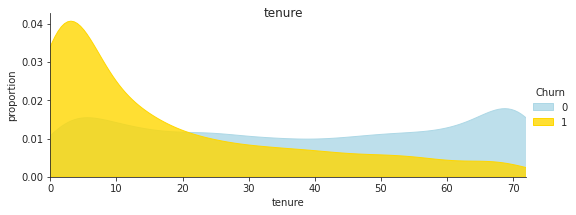

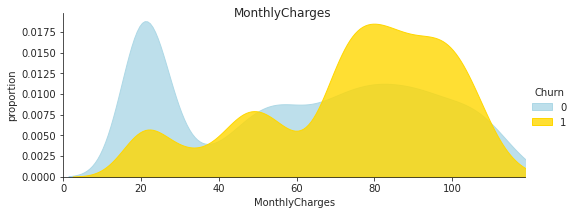

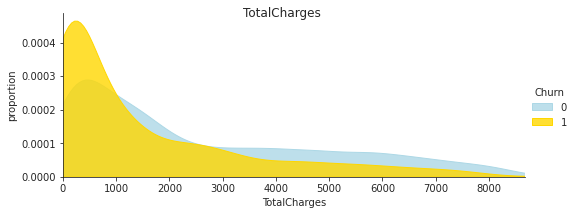

In [11]:
def plot_distribution_num(data_select) : 
    sns.set_style("ticks")
    s = sns.FacetGrid(data, hue = 'Churn',aspect = 2.5, palette ={0 : 'lightblue', 1 : 'gold'})
    s.map(sns.kdeplot, data_select, shade = True, alpha = 0.8)
    s.set(xlim=(0, data[data_select].max()))
    s.add_legend()
    s.set_axis_labels(data_select, 'proportion')
    s.fig.suptitle(data_select)
    plt.show()
    
plot_distribution_num('tenure')
plot_distribution_num('MonthlyCharges')
plot_distribution_num('TotalCharges')

## <a id='2.4'>2.4. Numeric features : Pairplots</a>

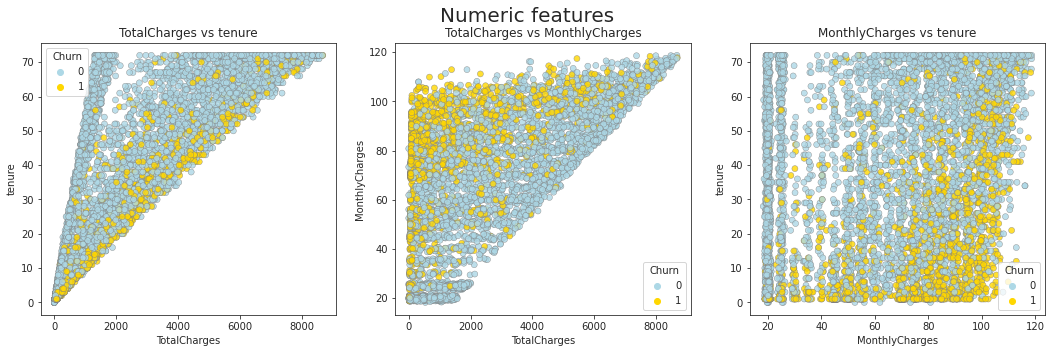

In [12]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'
fig = plt.figure(figsize=(18,5))
alpha = 0.8

plt.subplot(131)
ax1 = sns.scatterplot(x = data['TotalCharges'], y = data['tenure'], hue = "Churn",
                    data = data, palette = palette, edgecolor=edgecolor, alpha = alpha)
plt.title('TotalCharges vs tenure')

plt.subplot(132)
ax2 = sns.scatterplot(x = data['TotalCharges'], y = data['MonthlyCharges'], hue = "Churn",
                    data = data, palette =palette, edgecolor=edgecolor, alpha = alpha)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(133)
ax2 = sns.scatterplot(x = data['MonthlyCharges'], y = data['tenure'], hue = "Churn",
                    data = data, palette =palette, edgecolor=edgecolor, alpha = alpha)
plt.title('MonthlyCharges vs tenure')

fig.suptitle('Numeric features', fontsize = 20)
plt.savefig('1')
plt.show()

## <a id='2.5'>2.5. Numeric features : Correlation</a>

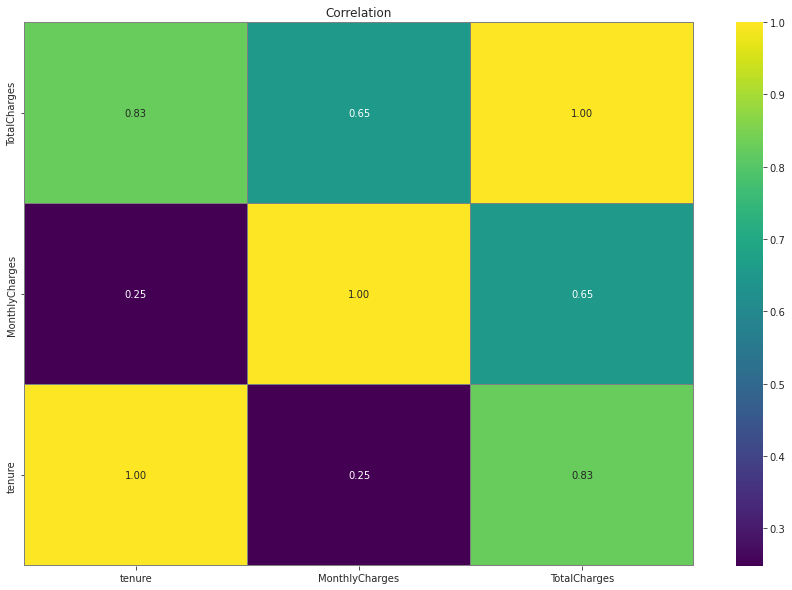

In [13]:
df_quant = data.select_dtypes(exclude=[object])
df_quant.head()
corr_quant = df_quant.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_quant, annot=True, cmap = 'viridis', linewidths = .1, linecolor = 'grey', fmt=".2f")
ax.invert_yaxis()
ax.set_title("Correlation")
plt.show()

## <a id='2.6'>2.6. Object features : Plotly </a>

In [14]:
data['gender'].value_counts().keys().tolist()

['Male', 'Female']

In [15]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Churn'] != 0)]
    tmp2 = data[(data['Churn'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Churn']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Churn : yes',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Churn : no', opacity = 0.8, marker=dict(
        color='lightblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Churn', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),  autosize = False,
                        height  = 500,
                        width   = 800,
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Churn'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [16]:
barplot('gender', True)
barplot('SeniorCitizen', True)
barplot('Dependents', True)
barplot('PhoneService', True)
barplot('MultipleLines', True)
barplot('InternetService', True)
barplot('OnlineSecurity', True)
barplot('Partner', True)
barplot('OnlineBackup', True)
barplot('DeviceProtection', True)
barplot('TechSupport', True)
barplot('StreamingTV', True)
barplot('StreamingMovies', True)
barplot('Contract', True)
barplot('PaperlessBilling', True)
barplot('PaymentMethod', True)

## <a id='2.7'>2.7. Object features : Seaborn </a>

In [17]:
def plot_distribution_cat(feature1, feature2, df): 
    plt.figure(figsize=(18,5))
    plt.subplot(121)
    s = sns.countplot(x = feature1, hue='Churn', data = df, 
                      palette = {0 : 'lightblue', 1 :'gold'}, alpha = 0.8, 
                      linewidth = 0.4, edgecolor='grey') 
    s.set_title(feature1)
    for p in s.patches:
        s.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))
    
    plt.subplot(122)
    s = sns.countplot(x = feature2, hue='Churn', data = df, 
                      palette = {0 : 'lightblue', 1 :'gold'}, alpha = 0.8, 
                      linewidth = 0.4, edgecolor='grey') 
    s.set_title(feature2)
    for p in s.patches:
        s.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))
    plt.show()

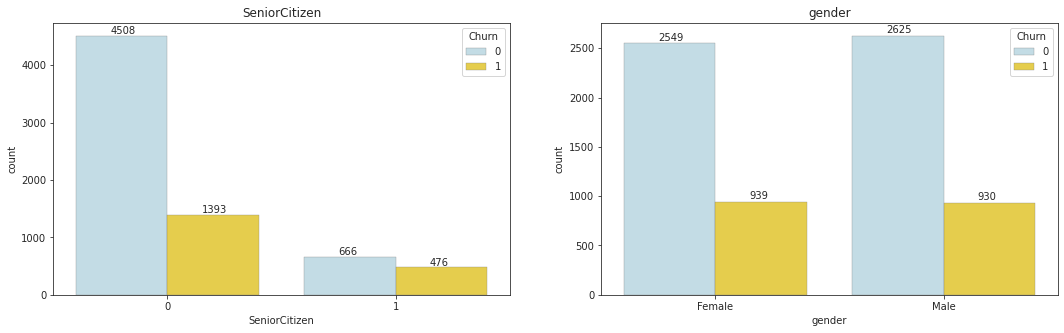

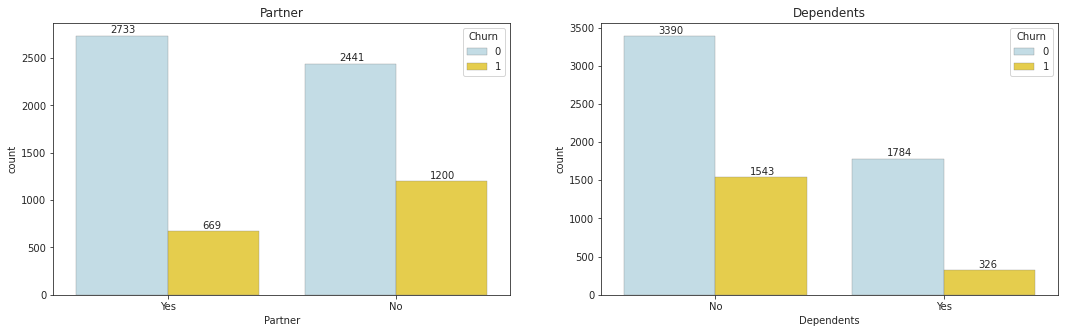

In [18]:
plot_distribution_cat('SeniorCitizen', 'gender', data)
plot_distribution_cat('Partner', 'Dependents', data)
#plot_distribution_cat('MultipleLines', 'InternetService', data)
#plot_distribution_cat('OnlineSecurity', 'TechSupport', data)
#plot_distribution_cat('DeviceProtection', 'StreamingTV',data)
#plot_distribution_cat('StreamingMovies', 'PaperlessBilling',data)
#plot_distribution_cat('PaymentMethod', 'Contract',data)

# <a id='3'>3. Feature engineering and selection</a>

## <a id='3.1'>3.1. New features</a>

In [19]:
data.loc[:,'Engaged']=1 
data.loc[(data['Contract']=='Month-to-month'),'Engaged']=0

data.loc[:,'YandNotE']=0
data.loc[(data['SeniorCitizen']==0) & (data['Engaged']==0),'YandNotE']=1

data.loc[:,'ElectCheck']=0 
data.loc[(data['PaymentMethod']=='Electronic check') & (data['Engaged']==0),'ElectCheck']=1

data.loc[:,'fiberopt']=1 
data.loc[(data['InternetService']!='Fiber optic'),'fiberopt']=0

data.loc[:,'StreamNoInt']=1 
data.loc[(data['StreamingTV']!='No internet service'),'StreamNoInt']=0

data.loc[:,'NoProt']=1 
data.loc[(data['OnlineBackup']!='No') | (data['DeviceProtection']!='No') | (data['TechSupport']!='No'),'NoProt']=0

data['TotalServices'] = (data[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [20]:
data['tenure'] = pd.cut(data['tenure'], 3)

## <a id='3.2'>3.2. Drop some features</a>

In [21]:
data = data.drop(columns = [
                            'Contract',
                            'DeviceProtection', 
                            'Partner'
                           ])

## <a id='3.3'>3.3. Features encoding and scaling</a>

In [22]:
#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = data.nunique()[data.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data = data.drop(['customerID'],axis = 1)

## <a id='3.4'>3.4. Correlation Matrix</a>

In [23]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 210,
                                           t = 25,b = 210,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [24]:
correlation_plot()

## <a id='3.5'>3.5. Remove collinear features</a>

In [25]:
#Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = data.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

data = data.drop(columns = to_drop)

to_drop

There are 8 columns to remove :


['MultipleLines_No phone service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [26]:
correlation_plot()

# <a id='4'>4. Prepare dataset and stylized report</a>

## <a id='4.1'>4.1. Define (X,  y)</a>

In [27]:
# Def X and Y
y = np.array(data.Churn.tolist())
data = data.drop('Churn', 1)
X = np.array(data.to_numpy())

## <a id='4.2'>4.2. Train test split </a>

In [28]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

## <a id='4.3'>4.3. Stylized report with Plotly (confusion matrix, metrics, roc, precision-recall, etc…)</a>

To measure the performance of a model, we need several elements :

This part is essential

* **Confusion matrix** : also known as the error matrix, allows visualization of the performance of an algorithm :

    * true positive (TP) : Diabetic correctly identified as diabetic
    * true negative (TN) : Healthy correctly identified as healthy
    * false positive (FP) : Healthy incorrectly identified as diabetic
    * false negative (FN) : Diabetic incorrectly identified as healthy

![](https://image.noelshack.com/fichiers/2018/20/5/1526651914-cs-heezweaa5hp7.jpg)

* **Metrics ** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP)
    * Recall : TP / (TP + FN)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall))

* **Roc Curve** : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

![](http://image.noelshack.com/fichiers/2019/06/1/1549284841-0-0-0-0-0-0-0-0-0-0.png)

* **Precision Recall Curve** :  shows the tradeoff between precision and recall for different threshold

In [29]:
def model_performance(model) : 
    #Conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #Roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #Feature importance
    coefficients  = pd.DataFrame(eval(model).feature_importances_)
    column_data   = pd.DataFrame(list(data))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace6 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients", 
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    #Cumulative gain
    pos = pd.get_dummies(y_test).to_numpy()
    pos = pos[:,1] 
    npos = np.sum(pos)
    index = np.argsort(y_score) 
    index = index[::-1] 
    sort_pos = pos[index]
    #cumulative sum
    cpos = np.cumsum(sort_pos) 
    #recall
    recall = cpos/npos 
    #size obs test
    n = y_test.shape[0] 
    size = np.arange(start=1,stop=369,step=1) 
    #proportion
    size = size / n 
    #plots
    model = model
    trace7 = go.Scatter(x = size,y = recall,
                        line = dict(color = ('gold'),width = 2), fill='tozeroy') 
    
    #Subplots
    fig = tls.make_subplots(rows=4, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                          'Precision - Recall curve',
                                          'Cumulative gains curve',
                                          'Feature importance'
                                          ))
    
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    fig.append_trace(trace6,4,1)
    fig.append_trace(trace7,3,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'black',
                        paper_bgcolor = 'black',
                        margin = dict(b = 195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(dict(color = 'white'),showgrid=False)
    fig["layout"]["yaxis1"].update(dict(color = 'white'),showgrid=False)
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'white')),showgrid=False)
    fig["layout"]["yaxis2"].update(dict(color = 'white'),showgrid=False)
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"),showgrid=False)
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"),color = 'white',showgrid=False)
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05],color = 'white',showgrid=False)
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05],color = 'white',showgrid=False)
    fig["layout"]["xaxis5"].update(dict(title = "Percentage contacted"),color = 'white',showgrid=False)
    fig["layout"]["yaxis5"].update(dict(title = "Percentage positive targeted"),color = 'white',showgrid=False)
    fig["layout"]["xaxis6"].update(dict(color = 'white'),showgrid=False)
    fig["layout"]["yaxis6"].update(dict(color = 'white'),showgrid=False)
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size = 14)
    py.iplot(fig)

## <a id='4.4'>4.4. Define cross validation metrics</a>

In [30]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

#  <a id='5'>5. Light GBM Model</a>

## <a id='5.1'>5.1. LightGBM - Before RandomizedSearchCV</a>

![](http://image.noelshack.com/fichiers/2019/06/1/1549285917-0000000000000000000.png)

** LightGBM** is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel and GPU learning.
* Capable of handling large-scale data.

In [31]:
%%time
lgbm_clf = lgbm.LGBMClassifier(n_estimators=1500, random_state = 42)

lgbm_clf.fit(X_train, y_train)
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
y_score = lgbm_clf.predict_proba(X_test)[:,1]

model_performance('lgbm_clf')

CPU times: user 23.6 s, sys: 478 ms, total: 24.1 s
Wall time: 23.6 s


## <a id='5.2'>5.2. LightGBM - RandomizedSearchCV to optimise hyperparameters  (1000 fits)</a>

To find the best hyperparameters, we'll use Random Search CV.

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. 
Generally RS is more faster and accurate than GridSearchCV who calculate all possible combinations. With Random Grid we specify the number of combinations that we want

* **LightGBM : Hyperparameters ** :

    * learning_rate : This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates
    * n_estimators : number of trees (or rounds)
    * num_leaves : number of leaves in full tree, default: 31
    * min_child_samples : minimal number of data in one leaf. Can be used to deal with over-fitting
    * min_child_weight : minimal sum hessian in one leaf.
    * subsample : randomly select part of data without resampling
    * max_depth : It describes the maximum depth of tree. This parameter is used to handle model overfitting.
    * colsample_bytree : LightGBM will randomly select part of features on each iteration if colsample_bytree smaller than 1.0. For example, if you set it to 0.8, LightGBM will select 80% of features before training each tree
    * reg_alpha : regularization
    * reg_lambda : regularization
    
    * early_stopping_rounds : This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations

In [32]:
fit_params = {"early_stopping_rounds" : 50, 
             "eval_metric" : 'binary', 
             "eval_set" : [(X_test,y_test)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 3000, 5000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 200

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=-1)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X_train, y_train, **fit_params)
print('Best params: {} '.format(grid_search.best_params_))

opt_parameters =  grid_search.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params: {'colsample_bytree': 0.5229905772494926, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 106, 'min_child_weight': 100.0, 'n_estimators': 100, 'num_leaves': 28, 'reg_alpha': 5, 'reg_lambda': 1, 'subsample': 0.2982215117301668} 


## <a id='5.3'>5.3. LightGBM - After RandomizedSearchCV</a>

In [33]:
%%time
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)

lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
y_score = lgbm_clf.predict_proba(X_test)[:,1]

model_performance('lgbm_clf')

CPU times: user 341 ms, sys: 5.02 ms, total: 347 ms
Wall time: 260 ms


## <a id='5.4'>5.4. LightGBM – Cross validation (5 folds)</a>

In [34]:
cross_val_metrics(lgbm_clf)

[accuracy] : 0.80846 (+/- 0.00839)
[precision] : 0.67589 (+/- 0.02234)
[recall] : 0.53559 (+/- 0.01370)
[f1] : 0.59749 (+/- 0.01524)
[roc_auc] : 0.84655 (+/- 0.01013)


#  <a id='6'>6. Credits</a>

https://www.kaggle.com/pavanraj159 (plotly master)

**Thank you all ! Merci à tous ! :)**